In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_point, geom_abline, geom_hline, labs, theme_light
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("cannabis_full.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2191 entries, 0 to 2350
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Strain        2191 non-null   object 
 1   Type          2191 non-null   object 
 2   Rating        2191 non-null   float64
 3   Effects       2191 non-null   object 
 4   Flavor        2191 non-null   object 
 5   Creative      2191 non-null   float64
 6   Energetic     2191 non-null   float64
 7   Tingly        2191 non-null   float64
 8   Euphoric      2191 non-null   float64
 9   Relaxed       2191 non-null   float64
 10  Aroused       2191 non-null   float64
 11  Happy         2191 non-null   float64
 12  Uplifted      2191 non-null   float64
 13  Hungry        2191 non-null   float64
 14  Talkative     2191 non-null   float64
 15  Giggly        2191 non-null   float64
 16  Focused       2191 non-null   float64
 17  Sleepy        2191 non-null   float64
 18  Dry           2191 non-null   flo

Part One: Binary Classification
Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

Report the (cross-validated!) metric.

Fit the final model.

Output a confusion matrix.

In [5]:
def best_model(df, targets, model_type):
    
    strain = df[df["Type"].isin(targets)]
    scaler = StandardScaler()
    strain["Rating"] = scaler.fit_transform(strain[["Rating"]])
    
    X = strain.drop(columns=["Type", "Strain", "Effects", "Flavor"])
    y = strain["Type"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #lda
    if model_type == "lda":
        model = LDA()
        cv_scores = cross_val_score(model, X_train, y_train, cv=7, scoring="accuracy")
        model.fit(X_train, y_train)

    #qda   
    elif model_type == "qda":
        params = {"reg_param": np.linspace(0, 1, 10)}
        model = GridSearchCV(QDA(), param_grid=params, cv=7, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_

    #svc   
    elif model_type == "svc":
        params = {
            "C": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
        model = GridSearchCV(SVC(), param_grid=params, cv=7, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_

    #svm 
    elif model_type == "svm":
        params = {
            "C": [0.01, 0.1, 1, 10],
            "degree": [2, 3, 4],
            "gamma": ["scale", "auto"],
            "coef0": [0, 1]
        }
        model = GridSearchCV(SVC(kernel="poly"), param_grid=params, cv=7, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_
   
    #Part 2 - knn 
    elif model_type == "knn":
        params = {"n_neighbors": range(1, 21)} 
        model = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=7, scoring="accuracy")
        model.fit(X_train, y_train)
        cv_scores = model.best_score_
        model = model.best_estimator_
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        "model": model,
        "cv_accuracy": np.mean(cv_scores) if model_type in ["lda", "knn"] else cv_scores,
        "matrix": cm
    }


In [9]:
#LDA
lda = best_model(df, targets = ["indica", "sativa"], model_type="lda")
print(lda["cv_accuracy"])
print(lda["matrix"])

0.8536299765807962
[[121  12]
 [ 17  64]]


/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_64683/926789510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
#QDA 
import warnings
warnings.filterwarnings("ignore", message="Variables are collinear")

qda = best_model(df, targets = ["indica", "sativa"], model_type="qda")
print(qda["cv_accuracy"])
print(qda["matrix"])

/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_2919/3050377483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.864168618266979
[[119  14]
 [ 15  66]]


In [13]:
#SVC
svc = best_model(df, targets = ["indica", "sativa"], model_type="svc")
print(svc["cv_accuracy"])
print(svc["matrix"])

/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_64683/926789510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.864168618266979
[[120  13]
 [ 15  66]]


In [14]:
#SVM
svm = best_model(df, targets = ["indica", "sativa"], model_type="svm")
print(svm["cv_accuracy"])
print(svm["matrix"])

/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_64683/926789510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.864168618266979
[[120  13]
 [ 15  66]]


Part Two: Natural Multiclass
Now use the full dataset, including the Hybrid strains.

Q1
Fit a decision tree, plot the final fit, and interpret the results.

Q2
Repeat the analyses from Part One for LDA, QDA, and KNN.

Q3
Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

In [6]:
hybrid = pd.read_csv("cannabis_full.csv")
hybrid = hybrid.dropna()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Accuracy: 0.6109422492401215


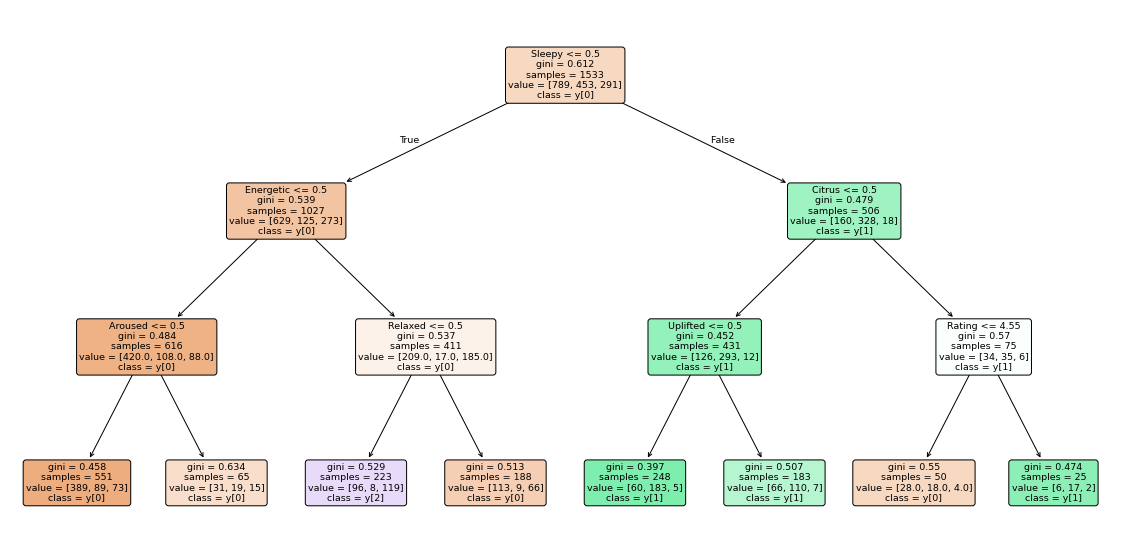

In [10]:
#Q1
import matplotlib.pyplot as plt

X = hybrid.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y = hybrid["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(random_state=42)

#Chat-gpt - Paramters for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()

In [11]:
#Q2
lda = best_model(hybrid, targets = ["indica", "sativa", "hybrid"], model_type="lda")
print(lda["cv_accuracy"])
print(lda["matrix"])

0.634720546385885
[[138  42  33]
 [ 51  90   1]
 [ 49   4  31]]


In [14]:
qda = best_model(hybrid, targets = ["indica", "sativa", "hybrid"], model_type="qda")
print(qda["cv_accuracy"])
print(qda["matrix"])

0.6278588503130337
[[122  54  37]
 [ 43  96   3]
 [ 51   4  29]]


In [16]:
knn = best_model(hybrid, targets = ["indica", "sativa", "hybrid"], model_type="knn")
print(knn["cv_accuracy"])
print(knn["matrix"])

0.6192737620944792
[[158  38  17]
 [ 60  82   0]
 [ 68   4  12]]


Q3
The accuracies in this section are lower than those in Part One, with cross-validated values averaging around 0.63 compared to 0.86 earlier. This drop in performance is likely due to Hybrid strains being easily confused with either Sativa or Indica, depending on the strain's dominant characteristics. The confusion matrices reveal that misclassification is most common between Hybrid and Sativa strains, as indicated by frequent off-diagonal entries. This likely stems from overlapping feature patterns, making it challenging for the model to accurately distinguish between these two categories.

Part Three: Multiclass from Binary
Consider two models designed for binary classification: SVC and Logistic Regression.

In [20]:
#Q3

X = hybrid.drop(columns=["Type", "Strain", "Effects", "Flavor"])  
y = hybrid["Type"]
class_labels = ["indica", "sativa", "hybrid"] 

for label in class_labels:
    #ChatGPT - Iterate through labels in for loop
    y_binary = np.where(y == label, 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=1)
    
    svc = SVC(probability=True, random_state=1)
    svc.fit(X_train, y_train)
    
    y_pred_svc = svc.predict(X_test)
    print(f"Metrics for SVC: {label} vs. Not {label}")
    print(classification_report(y_test, y_pred_svc))
    
    log_reg = LogisticRegression(max_iter=1000, random_state=1)
    log_reg.fit(X_train, y_train)
    
    y_pred_log_reg = log_reg.predict(X_test)
    print(f"Metrics for Logistic Regression: {label} vs. Not {label}")
    print(classification_report(y_test, y_pred_log_reg))


Metrics for SVC: indica vs. Not indica
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       307
           1       0.61      0.71      0.66       132

    accuracy                           0.77       439
   macro avg       0.74      0.76      0.74       439
weighted avg       0.79      0.77      0.78       439

Metrics for Logistic Regression: indica vs. Not indica
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       307
           1       0.65      0.64      0.65       132

    accuracy                           0.79       439
   macro avg       0.75      0.75      0.75       439
weighted avg       0.79      0.79      0.79       439

Metrics for SVC: sativa vs. Not sativa
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       357
           1       0.00      0.00      0.00        82

    accuracy                           0.81      

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Metrics for SVC: hybrid vs. Not hybrid
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       214
           1       0.58      0.76      0.66       225

    accuracy                           0.60       439
   macro avg       0.61      0.60      0.59       439
weighted avg       0.61      0.60      0.59       439

Metrics for Logistic Regression: hybrid vs. Not hybrid
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       214
           1       0.61      0.68      0.64       225

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



Q2
Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The Logistic Regression model for "Indica vs. Not Indica" performed the best, with a balanced macro F1-score of 0.75 and accuracy of 79%, showing it effectively distinguished the target category. The SVC model for "Sativa vs. Not Sativa" performed the worst, failing to predict the minority class entirely, as indicated by a precision and recall of 0. Yes this makes sense.

In [25]:
#Q3
#SVC
pairs = [("indica", "sativa"), ("indica", "hybrid"), ("hybrid", "sativa")]

for class1, class2 in pairs:
    #ChatGPT - Help iterate through classes
    mask = (y == class1) | (y == class2)
    X_filtered, y_filtered = X[mask], y[mask]
    
    y_binary = np.where(y_filtered == class1, 1, 0)
    
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_binary, test_size=0.3, stratify=y_binary, random_state=1)
    
    svc = SVC(probability=True, random_state=1)
    svc.fit(X_train, y_train)
    
    y_pred = svc.predict(X_test)
    print(f"Metrics for SVC: {class1} vs. {class2}")
    print(classification_report(y_test, y_pred))

Metrics for SVC: indica vs. sativa
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       123
           1       0.87      0.93      0.90       198

    accuracy                           0.87       321
   macro avg       0.87      0.85      0.86       321
weighted avg       0.87      0.87      0.87       321

Metrics for SVC: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       337
           1       0.66      0.70      0.68       198

    accuracy                           0.76       535
   macro avg       0.74      0.74      0.74       535
weighted avg       0.76      0.76      0.76       535

Metrics for SVC: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.73      1.00      0.85       337

    accuracy                           0.73       460
   macro avg       0.37

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [26]:
#Logistic
for class1, class2 in pairs:
    mask = (y == class1) | (y == class2)
    X_filtered, y_filtered = X[mask], y[mask]
    
    y_binary = np.where(y_filtered == class1, 1, 0)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y_binary, test_size=0.3, stratify=y_binary, random_state=1
    )
    
    lr = LogisticRegression(random_state=1)
    lr.fit(X_train, y_train)
    
    #evaluate
    y_pred = lr.predict(X_test)
    print(f"Metrics for Logistic Regression: {class1} vs. {class2}")
    print(classification_report(y_test, y_pred))

Metrics for Logistic Regression: indica vs. sativa
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       123
           1       0.87      0.91      0.89       198

    accuracy                           0.87       321
   macro avg       0.86      0.85      0.86       321
weighted avg       0.87      0.87      0.86       321

Metrics for Logistic Regression: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       337
           1       0.68      0.63      0.66       198

    accuracy                           0.76       535
   macro avg       0.74      0.73      0.73       535
weighted avg       0.75      0.76      0.75       535

Metrics for Logistic Regression: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.59      0.32      0.41       123
           1       0.79      0.92      0.85       337

    accuracy                 

Q4
Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

Out of all the models, logistic regression, Indica vs Stativa did the best (accuracy = 0.87). SVC hybrid vs. sativa performed the worst with a accuracy of just 0.73. This result makes sense, as Indica vs. Sativa likely performed best due to their distinct characteristics, while Hybrid vs. Sativa struggled because hybrids share traits with both, causing greater overlap.

Q5
Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?
What about for SVC?

For multiclass classification, LogisticRegression in sklearn automatically uses the "One-vs-Rest" (OvR) approach by default. However, it can perform true multinomial logistic regression if the multi_class="multinomial" option is specified with compatible solvers like lbfgs. On the other hand, SVC naturally handles multiclass input using the "One-vs-One" (OvO) approach, training separate classifiers for each pair of classes.